#   多元迴歸(Multiple regression)，或稱一般線性回歸
*   大於一個自變數(x1,x2,...)的情形。例如 $ y = \beta_0 + \beta_1 x_1 + \beta_1 x_2+ \epsilon $ 。

[參考網址](https://github.com/andy6804tw/2021-13th-ironman/tree/main/8.%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8)


### 手刻線性回歸
我們透過 Sklearn 所提供的房價預測資料集進行線性回歸模型建模，並採用最小平法。首先為了要驗證我們上面的公式，因此我們先利用 Numpy 套件自己手刻做一系列的矩陣運算求出每一項的係數與截距。<font color = orange> 參考網站使用 Sklearn 提供的資料，此改為用網址直接取得</font>。

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
#boston_dataset = load_boston() #使用sklearn提供的資料
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]

# 輸入特徵共13個
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# 設定截距項 b 權重值為 1 
b=np.ones((X.shape[0], 1))
# 添加常數項特徵，最終有 13+1 個輸入特徵
X=np.hstack((X, b))
# 輸出(房價)
y = raw_df.values[1::2, 2]

# 計算 Beta (@ 為 numpy 中 2-D arrays 的矩陣乘法)
Beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ Beta

print('MSE:', mean_squared_error(y_pred, y))
print("beta = %s" %Beta)

MSE: 21.894831181729206
beta = [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]


### Sklearn LinearRegression 模型
線性回歸簡單來說，就是將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料。接下來我們一樣使用房價預測資料集，並使用 Sklearn 提供的 LinearRegression 來求解。

Parameters:
*   fit_intercept: 是否有截距，如果沒有則直線過原點。

Attributes:
*   coef_: 取得係數。
*   intercept_: 取得截距。

Methods:
*   fit: 放入X、y進行模型擬合。
*   predict: 預測並回傳預測類別。
*   score: R2 score 模型評估。

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# 輸入特徵共13個
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# 輸出(房價)
y = raw_df.values[1::2, 2]

# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X, y)

y_pred = linearModel.predict(X)
print('MSE:', mean_squared_error(y_pred, y))

MSE: 21.894831181729202


In [9]:
# 取得13個特徵係數
print("係數 : %s" %linearModel.coef_)
# 取得截距
print("截距 : %s" %linearModel.intercept_)

係數 : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
截距 : 36.459488385089855


### 迴歸分析的 ANOVA(變異數分析;方差) 表

製作迴歸的 ANOVA 表的目的在於，檢定自變量是否能解釋依變量，也可以用來比較同依變量不同自變量的 p值(越低代表那些自變量較能解釋依變量)。

除了用來比較兩群自變量，也可以把 ANOVA 表的細分，一次對一個自變量做檢定(所以有k個p_value)，此方法稱為 type I 方法; 或是一次對 k-1 個自變量檢定(做k次, 每次少的自變量都不一樣, 一樣有 k 個p_avlue)，此方法稱為 type II 方法。
*   type I : 用於檢定各個自變數解釋依變數的程度。
*   type II : 和 type I 類似，用於檢定少一個自變量後解釋依變量的程度。
*   [參考網站 : Anova – Type I/II/III SS explained](https://www.r-bloggers.com/2011/03/anova-%E2%80%93-type-iiiiii-ss-explained/)

當然，為了決定要用那些自變量，可以使用不同方法，例如 forward、backward ，又稱逐步迴歸。
*   Forward : 從完全沒有自變量開始，和所有未放入的自變量一一配對，和自己的 p_value 去比較，選擇最低的 P_value 結果。重複直到沒放入自變量時 p_value 比較大，或是選擇了所有自變量。
*   Backward : 和 Forward 類似，不過是從選擇所有自變量開始一一移除。
*   Forward & Backward : 放入和刪除同時進行，選擇最低的 p_value
*   [參考網站 : Understand Forward And Backward Stepwise Regression](https://quantifyinghealth.com/stepwise-selection/)

<img src="https://imgur.com/oKZqCD3.png" width="70%" height="70%">

參考資料:
*   [【统计学笔记】方差分析表和回归分析表的解读](https://blog.csdn.net/MYMarcoreus/article/details/111945748)
*   [多元线性回归方差分析表理解](https://blog.51cto.com/u_14902625/5472080)

其他程式:
*   R : [ANOVA and model fit](https://bookdown.org/egarpor/SSS2-UC3M/multlin-aovfit.html)

#### python

參考資料 :
*   [Python回歸模型01─運用OLS做回歸](https://ithelp.ithome.com.tw/articles/10283807?sc=pt)
*   [Python画图 %matplotlib inline语句的使用和作用](https://blog.csdn.net/leowinbow/article/details/86574159)

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm     #回歸模型套件

In [44]:
data = pd.read_csv('D:/github/git_data/基本/監督式學習/Regression/Multiple regression/mranova_test.csv', index_col = 'i') 

# 此資料是用R隨便生成的, 程式如下
'''
set.seed(42)
u <- rnorm(100)
v <- rnorm(100, mean = 3,  sd = 2)
w <- rnorm(100, mean = -3, sd = 1)
e <- rnorm(100, mean = 0,  sd = 3)
p <- rnorm(100, mean = 10, sd = 5)
y <- 5 + 4 * u + 3 * v + 2 * w + e
'''

'\nset.seed(42)\nu <- rnorm(100)\nv <- rnorm(100, mean = 3,  sd = 2)\nw <- rnorm(100, mean = -3, sd = 1)\ne <- rnorm(100, mean = 0,  sd = 3)\np <- rnorm(100, mean = 10, sd = 5)\ny <- 5 + 4 * u + 3 * v + 2 * w + e\n'

In [36]:
dfX = data.drop('y', axis=1) #刪除 y 那個 col 後，剩下的為自變數
dfY = data[['y']]

dfX_corr = dfX.corr() #查看數據間的相關係數
print(dfX_corr)


          u         v         w         e         p
u  1.000000  0.031280 -0.144777  0.074237  0.084276
v  0.031280  1.000000  0.071227  0.008645 -0.120723
w -0.144777  0.071227  1.000000 -0.045980  0.059337
e  0.074237  0.008645 -0.045980  1.000000  0.185014
p  0.084276 -0.120723  0.059337  0.185014  1.000000


<AxesSubplot:>

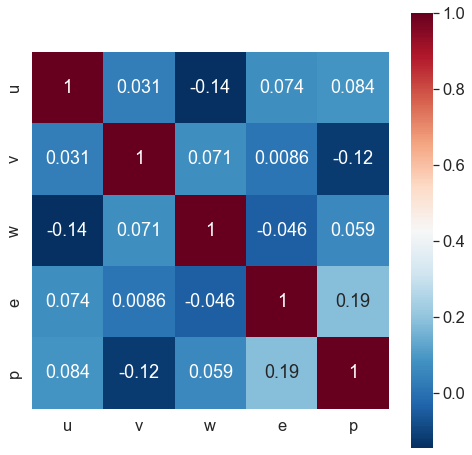

In [52]:
#視覺化
%matplotlib inline 
#%matplotlib inline这一句是IPython的魔法函数，可以在IPython编译器里直接使用，作用是内嵌画图，省略掉plt.show()这一步，直接显示图像 
import seaborn as sns
sns.set(font_scale=1.5) #字體大小
sns.set_context({"figure.figsize":(8,8)}) #圖形大小
sns.heatmap(data = dfX_corr, square = True, cmap="RdBu_r", annot = True) 

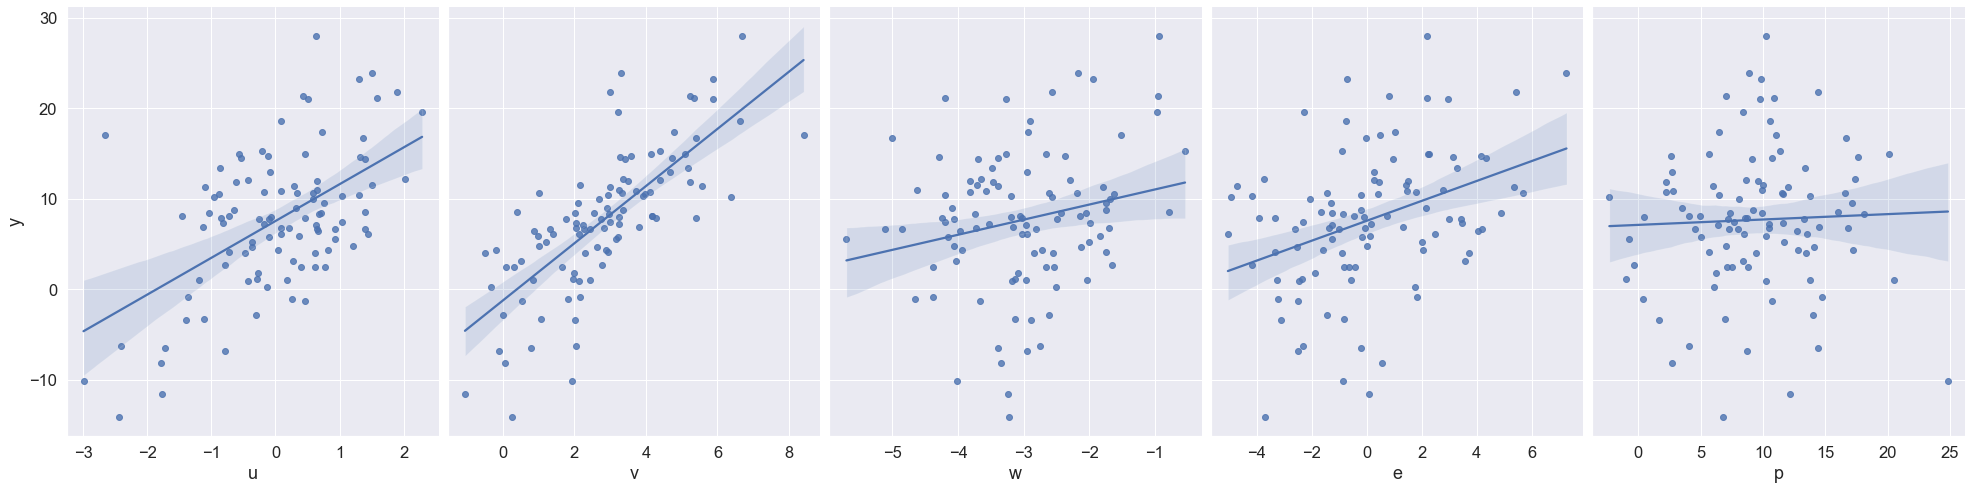

In [58]:
#檢視資料分布情形
import seaborn as sns               #載入分布圖形套件
import matplotlib.pyplot as plt     #載入畫圖套件

sns.pairplot(data, x_vars=["u", "v", "w", "e", 'p'], y_vars='y',height = 7, aspect = 0.8, kind='reg')  
plt.show()

In [59]:
#建模
dfX = sm.add_constant(dfX)   #增加模型的常數，使更為符合回歸模型

model0 = sm.OLS(dfY, dfX)    #OLS回歸
results0 = model0.fit()

print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.910e+29
Date:                Wed, 18 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:05:30   Log-Likelihood:                 2942.8
No. Observations:                 100   AIC:                            -5874.
Df Residuals:                      94   BIC:                            -5858.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000    1.8e-14   2.77e+14      0.0